In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset

In [2]:
dataset = pd.read_csv("Dataset/KNN.csv")

x = dataset.iloc[:, :2].values
y = dataset.iloc[:, -1].values

In [3]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25)

In [60]:
print(xTrain)

[[146  76]
 [136  84]
 [189  64]
 ...
 [180  66]
 [131  68]
 [179  50]]


In [61]:
print(yTrain)

[0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 

In [62]:
print(xTest)

[[115  98]
 [169  74]
 [113  44]
 [ 81  78]
 [102  86]
 [138  82]
 [122  70]
 [138   0]
 [183  64]
 [104  74]
 [105  68]
 [123  74]
 [ 89  74]
 [146  92]
 [102  52]
 [158  76]
 [102  75]
 [188  78]
 [125  86]
 [ 88  62]
 [128  88]
 [187  70]
 [175  62]
 [168  88]
 [156  86]
 [140  94]
 [196  76]
 [ 97  68]
 [ 90  78]
 [ 95  66]
 [126  90]
 [ 95  60]
 [ 99  72]
 [146  78]
 [125  58]
 [100  84]
 [129  60]
 [134  70]
 [127  80]
 [159  64]
 [ 91  64]
 [165  90]
 [140  82]
 [113  64]
 [117  92]
 [163  72]
 [135  94]
 [ 87  68]
 [120  86]
 [ 89  24]
 [197  70]
 [156  86]
 [ 95  72]
 [173  74]
 [109  88]
 [ 93  70]
 [100  70]
 [124  76]
 [135  68]
 [181  64]
 [146   0]
 [120  70]
 [102  86]
 [153  88]
 [133  72]
 [126  60]
 [ 89  76]
 [152  90]
 [ 93 100]
 [164  82]
 [ 91  54]
 [138  60]
 [106  56]
 [128  78]
 [119  44]
 [111  62]
 [168  88]
 [198  66]
 [ 96 122]
 [124  80]
 [101  50]
 [134  58]
 [144  82]
 [109  58]
 [131  66]
 [148  84]
 [ 92  76]
 [142  86]
 [119  64]
 [123  48]
 [116  72]

In [63]:
print(yTest)

[1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0]


# Feature scaling

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

In [65]:
#print(xTrain)
print(len(xTrain[0]))

2


In [66]:
print(xTest)

[[-0.1480637   1.52361844]
 [ 1.54571101  0.27657869]
 [-0.2107961  -1.28222099]
 [-1.21451445  0.48441865]
 [-0.55582428  0.90009856]
 [ 0.57335886  0.69225861]
 [ 0.07149969  0.06873874]
 [ 0.57335886 -3.56846052]
 [ 1.98483779 -0.2430212 ]
 [-0.49309189  0.27657869]
 [-0.46172569 -0.03518124]
 [ 0.10286588  0.27657869]
 [-0.96358486  0.27657869]
 [ 0.82428845  1.2118585 ]
 [-0.55582428 -0.86654107]
 [ 1.20068283  0.38049867]
 [-0.55582428  0.32853868]
 [ 2.14166879  0.48441865]
 [ 0.16559828  0.90009856]
 [-0.99495106 -0.34694118]
 [ 0.25969688  1.00401854]
 [ 2.11030259  0.06873874]
 [ 1.7339082  -0.34694118]
 [ 1.51434482  1.00401854]
 [ 1.13795043  0.90009856]
 [ 0.63609126  1.31577848]
 [ 2.39259837  0.38049867]
 [-0.71265528 -0.03518124]
 [-0.93221867  0.48441865]
 [-0.77538767 -0.13910122]
 [ 0.19696448  1.10793852]
 [-0.77538767 -0.45086116]
 [-0.64992288  0.17265871]
 [ 0.82428845  0.48441865]
 [ 0.16559828 -0.55478114]
 [-0.61855668  0.79617859]
 [ 0.29106307 -0.45086116]
 

# Applying a model (KNN)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier()

# Sample result

In [68]:
yPred = classifier.predict(xTest)


# Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(yTest, yPred)
print(cm)

[[98 15]
 [37 42]]


# Accuracy Score

In [70]:
acc = accuracy_score(yTest, yPred)
print("Acc: ", acc*100, "%")

Acc:  72.91666666666666 %


# Visualising the training set and test set results

## Training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


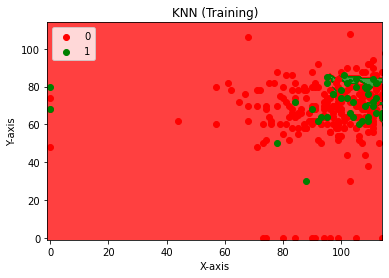

In [74]:
from matplotlib.colors import ListedColormap

xSet, ySet = sc.inverse_transform(xTrain), yTrain
x1, x2 = np.meshgrid(
    np.arange(start=xSet[:, 0].min() - 1, stop=xSet[:, 0].max() + 1, step=1),
    np.arange(start=xSet[:, 1].min() - 1, stop=xSet[:, 1].max() + 1, step=1)
)

plt.contourf(
    x1, x2,
    classifier.predict(
        sc.transform(np.array([x1.ravel(), x2.ravel()]).T)
    ).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())

for i, j in enumerate(np.unique(ySet)):
    plt.scatter(
        xSet[ySet == j, 0], xSet[ySet == j, 1], 
        c=ListedColormap(('red', 'green'))(i), label=j       
    )
    
plt.title('KNN (Training)')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.legend()
plt.show()

## Testing set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


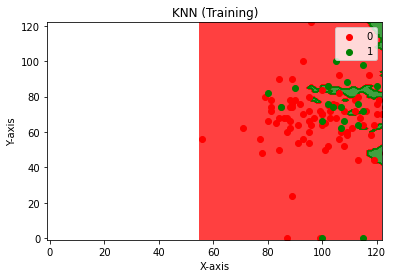

In [75]:
from matplotlib.colors import ListedColormap

xSet, ySet = sc.inverse_transform(xTest), yTest
x1, x2 = np.meshgrid(
    np.arange(start=xSet[:, 0].min() - 1, stop=xSet[:, 0].max() + 1, step=1),
    np.arange(start=xSet[:, 1].min() - 1, stop=xSet[:, 1].max() + 1, step=1)
)

plt.contourf(
    x1, x2,
    classifier.predict(
        sc.transform(np.array([x1.ravel(), x2.ravel()]).T)
    ).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())

for i, j in enumerate(np.unique(ySet)):
    plt.scatter(
        xSet[ySet == j, 0], xSet[ySet == j, 1], 
        c=ListedColormap(('red', 'green'))(i), label=j       
    )
    
plt.title('KNN (Training)')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.legend()
plt.show()